# Algerian Forest Fires Dataset Project EDA Part

# 1. UNDERSTANDING THE GIVEN TASK

Task Given by instructor Krish Naik

Solve in ipynb:
Import the dataset. https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
Do proper EDA(analysis) of your dataset and create a report
Then perform necessary preprocessing steps

# 2. DATA COLLECTION AND UNDERSTANDING

   1-  I used a dataset on Algerian Forest Fires from UCI.    The dataset contains a culmination
    of forest fire observations and data in two regions of Algeria: the Bejaia region and the
    Sidi Bel-Abbes region. The timeline of this dataset is from June 2012 to September 2012. In 
    this project, we focused on whether certain weather features could predict forest fires in
    these regions using few Classification algorithms.

   2 -  As per the Task given i choose regression problem to predict fire weather index

# 3. DATA EXPLORATION

In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.

    
Below are tasks to be performed in EDA:
    
1. Importing Libraries

2. Data Cleaning for EDA Report

3. Exploratory Data Analysis (EDA) on all Features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [26]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [30]:
# Check Missing values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [84]:
# Remove null or na values
df = df.dropna().reset_index(drop = True)

# Null rows are removed

In [82]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#remove 122th column
df= df.drop(122).reset_index(drop=True)

In [31]:
# check duplicates
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [20]:
# Remove all duplicates
df.drop_duplicates(inplace = True)

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [33]:
# Explore more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [50]:
#Statistical data
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [64]:
df['day'].dtype

dtype('O')

In [66]:
# Number of unique values in each column
df.nunique()

day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
Classes          9
dtype: int64

# Some column names were misspaced so we can fix it

In [73]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()

In [74]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [117]:
df= df.drop(122).reset_index(drop=True)

In [118]:
df['day'] = df['day'].astype(int)

In [119]:
df['day'].dtype

dtype('int64')

In [120]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [122]:
objects = [feature for feature in df.columns if df[feature].dtype=='O']
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


# Data cleaning Target variable

In [133]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [134]:
# misspaced target variable
df['Classes'] = df['Classes'].str.strip()

In [135]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [136]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

# Region 1 (Bejaia Region)

In [137]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


# Region 1 (Bejaia Region)

In [139]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [140]:
# Dropping year features

df1 = df.drop(['day','month','year'], axis = 1)

In [142]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [143]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [144]:
df1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

/tmp/ipykernel_615/4006685146.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<AxesSubplot: title={'center': 'Temperature'}>,
        <AxesSubplot: title={'center': 'RH'}>,
        <AxesSubplot: title={'center': 'Ws'}>],
       [<AxesSubplot: title={'center': 'Rain'}>,
        <AxesSubplot: title={'center': 'FFMC'}>,
        <AxesSubplot: title={'center': 'DMC'}>],
       [<AxesSubplot: title={'center': 'DC'}>,
        <AxesSubplot: title={'center': 'ISI'}>,
        <AxesSubplot: title={'center': 'BUI'}>],
       [<AxesSubplot: title={'center': 'FWI'}>,
        <AxesSubplot: title={'center': 'Classes'}>, <AxesSubplot: >]],
      dtype=object)

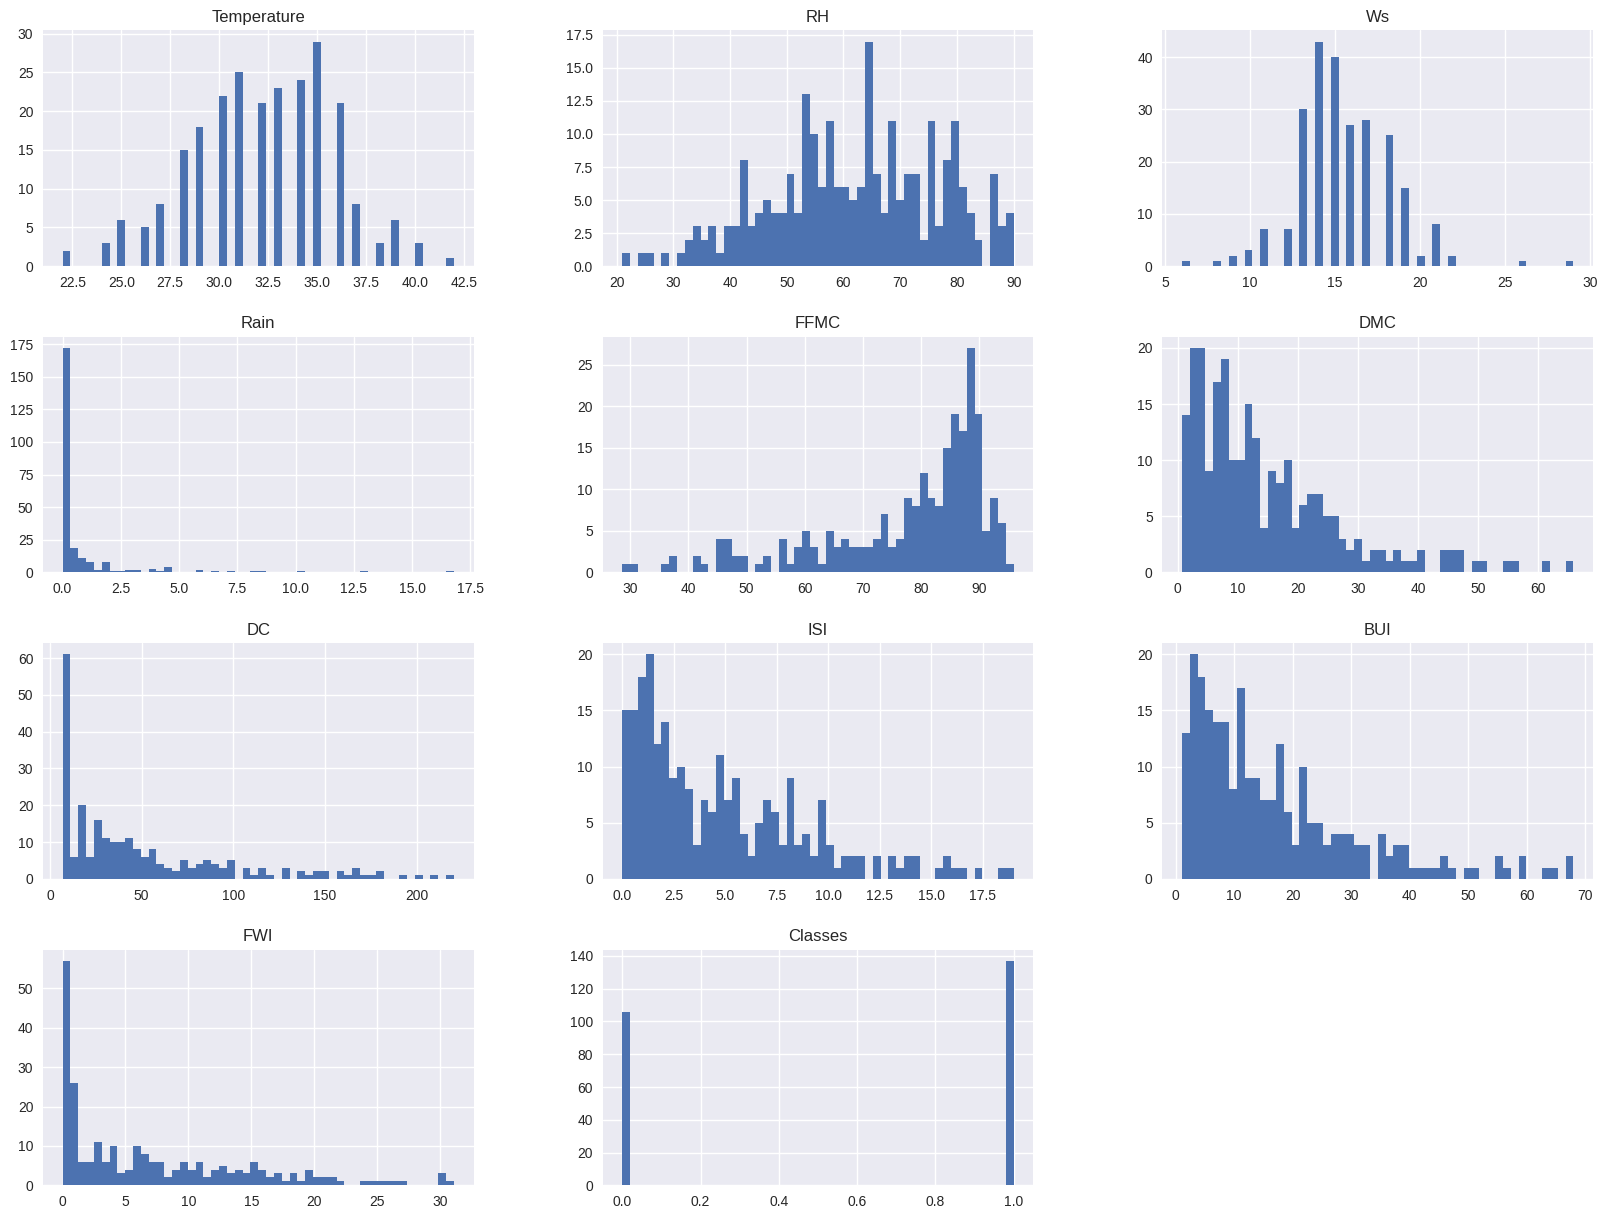

In [156]:
# PLot density plot for all features
plt.style.use('seaborn')
df1.hist(figsize=(20, 15), bins =50)